In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import sympy
import matplotlib.pyplot as plt

# Maximum Likelihood Estimation: the regression context
Alex Gorodetsky, October 2020, Updated October 21


In this notebook we look at maximum likelihood estimation for the regression problem. 



## The regression problem 

This problem is defined by data $d = (x,y)$ that arrives in input-output pairs such that the output $y \in \mathcal{Y} \subset \mathbb{R}^{n}$ is a real number. We will also consider that the input is a real number $x \in \mathcal{X} \subset \mathbb{R}^{m}$. The goal of regression is to learn some map (function) $f:\mathcal{X} \to \mathcal{Y}$ from the input to the output space. In other words, the regression problem seeks to learn $f$ given this data. 

As we have discussed, to fully specify a learning problem we first need to identify the parameters $\theta$ and the sampling distribution. The parameters $\theta$ come from a specification of the space of functions over which we search for a good $f$, the sampling distribution comes from a noise model.

### The search space 
Whenever we want to learn something in the frequentist context we must specify a feasible space $\mathcal{F}$ from which to choose the "best" object --- in the Bayesian case we also have the prior that performs this function. Here are some examples:

1. The space of linear functions $\mathcal{F} = \{ f(x) \ ; \ f(x) = w^T x + b\}$, this space is defined by the slope $w$ and the offset $b$; ($\theta = (w, b)$)
2. The space of polynomial functions $\mathcal{F} = \{f(x) \ ; \ f(x) = \sum_{i=0}^p \theta_i x^i \}$ for some polynomial order $p$ (higher-dimensional extensions are also possible)
3. The space of neural networks of a fixed depth $d$ and width $p$: $\mathcal{F} = \{f(x) \ ; \ f(x) = \mathcal{NN}(W_1,\ldots, W_d)\}$; ($\theta = (W_1,\ldots,W_d)$)

Example:
$$f(x) = \sigma(W_1 \sigma(W_2 \ldots \sigma(W_d x)))$$

The first two are *linear* spaces, the functions are **linear in their unknowns**. The space of neural networks is a nonlinear space --- the function is **nonlinear in the weights.** You often hear a lot of noise in the media/literature that neural networks are good because they are "universal approximators" --- this is nonsense. Taylor series (a polynomial space) is also a universal approximator. A more correct verbiage is that neural networks are more *expressive* than polynomial functions for *a fixed number of parameters* (even this has some technical points). This expressivity / representation capacity comes from the fact that they are a particular type of nonlinear approximation space.

The main idea is that this choice of function space is very important -- it should be done in a way that balances (1) prior knowledge; (2) representation capacity; and (3) computational expense.

### The noise model
Next we need a noise model. This means that we essentially account for the fact that for any choice of $\mathcal{F}$ no model in $\mathcal{F}$ will ever perfectly represent the data. We need to somehow account for this "error" -- this is done via a noise model. Aside from other knowledge the standard noise model is a Gaussian so that we have 

\begin{equation}
Y = f(x; \theta) + \xi, \quad \xi \sim \mathcal{N}(0, \Gamma)
\end{equation}
where $\Gamma \in \mathbb{R}^{n \times n}$ is a covariance matrix. We have seen before that this noise model implies a Gaussian sampling distribution.

\begin{equation}
f_{(Y,x) \mid \Theta}(y \mid x, \theta) = \frac{1}{\left(2\pi\right)^{n/2}|\Gamma|^{1/2}} \exp\left(-\frac{1}{2} \lVert y - f(x ;\theta)\rVert_\Gamma^2 \right)
\end{equation}

## The linear case

We will focus our current attention on the linear function space (we will later see a polynomial function space as well). This space both allows very efficient algorithms, but the concepts also underpin more complex function spaces. For demonstration purposes we will also consider that $n=1$.

The unknowns in this linear case is a set of parameters $\theta = (\theta_0, \theta_1, \ldots, \theta_m)$; consisting of a single offset intercept ($\theta_0$) and $m$ slopes so that 

\begin{equation}
f(x; \theta) = \theta_0 + \theta_{1:m}^T x
\end{equation}

The sampling distribution becomes

\begin{equation}
f_{(Y,x) \mid \Theta}(y \mid x, \theta) = \frac{1}{\left(2\pi\right)^{n/2}|\Gamma|^{1/2}} \exp\left(-\frac{1}{2} \lVert y - \theta_0 - \theta_{1:m}^T x \rVert_\Gamma^2 \right)
\end{equation}

Lets now derive the likelihood. Suppose that the data consists of $N$ independent input-output pairs $\left(x^{(i)},y^{(i)}\right)_{i=1}^N$. Then we obtain

\begin{equation}
\mathcal{L}(\theta) = \left(\frac{1}{\left(2\pi\right)^{1/2}\sigma}\right)^{N}  \prod_{i=1}^N \exp\left(-\frac{1}{2\sigma^2} \left( y^{(i)} - \theta_0 - \theta_{1:m}^T x^{(i)}\right)^2 \right)
\end{equation}

The log-likelihood becomes

\begin{equation}
L\mathcal{L}(\theta) = -\frac{N}{2} \log 2\pi - \frac{N}{2} \log | \sigma | - \frac{1}{2\sigma^2} \sum_{i=1}^N  \left(y^{(i)} - \theta_0 - \theta_{1:m}^T x^{(i)} \right)^2
\end{equation}

## Breakout sessions

1. Write the sampling distribution for the case when $n > 1$ Specify what the parameters are in this case: $\theta_0 $ now becomes a $n \times 1$ vector and $\theta_{1:m}$ now becomes an $n \times m$  where $x$ is an $m \times 1$ vector.
2. What happens to the likelihood if each data point is independent; however the noise is dependent on $x$ so that we have $\Gamma(x)$ instead of a fixed $\Gamma$? 

\begin{equation}
\mathcal{L}(\theta) = \left(\frac{1}{\left(2\pi\right)^{1/2}}\right)^{N}  \prod_{i=1}^N \frac{1}{\sigma(x^{(i)})} \exp\left(-\frac{1}{2\sigma(x^{(i)})^2} \left( y^{(i)} - \theta_0 - \theta_{1:m}^T x^{(i)}\right)^2 \right)
\end{equation}

3. Derive the maximum likelihood estimate of the coefficients for original likelihood given above.

# Maximum Likelihood estimation

Lets now take a look at the maximum likelihood estimator $\theta^{MLE} = \arg \max L \mathcal{L}(\theta)$. This is a linear least squares problem. We can find the solution by setting the gradient of the log likelihood to zero. This yields the following equation
\begin{align}
\theta^{MLE} &= \left(\sum_{i=1}^N \begin{bmatrix} 1 \\ x^{(i)} \end{bmatrix} \left[1 \ x^{(i)^T}\right] \right)^{\dagger} \begin{bmatrix}
\sum_{i=1}^N y^{(i)} \\
\sum_{i=1}^N y^{(i)} x^{(i)}
\end{bmatrix} \\
   &= 
   \left( 
   \begin{bmatrix}
   N & \sum_{i=1}^N x^{(i)^T}  \\
   \sum_{i=1}^N x^{(i)} & \sum_{i=1}^N x^{(i)} x^{(i)^T}
   \end{bmatrix}
   \right)^{\dagger} 
   \begin{bmatrix}
    \sum_{i=1}^N y^{(i)} \\
    \sum_{i=1}^N y^{(i)} x^{(i)}
    \end{bmatrix}
\end{align}
Notice that invertibility would have required at least $m+1$ datapoints

**Note this is a very specialized case of the linear-Gaussian problem in the notes:** How is it specialized?

In [26]:
def linear_least_squares_mle(x, y):
    """Perform Linear Least Squares with constant measurement noise for a scalar output
    
    Inputs
    -------
    x: (N, d) array of inputs
    y: (N) array of outputs
        
    Returns
    --------
    Maximum likelihood estimate
    """
    N, d = x.shape
    A = np.zeros((d+1, d+1))
    A[0, 0] = N
    sumx = np.sum(x, axis=0)
    A[0, 1:] = sumx
    A[1:, 0] = sumx
    A[1:, 1:] = np.einsum('nd,nm->dm', x, x)

    b = np.zeros((d+1))
    b[0] = np.sum(y)
    b[1:] = np.sum(np.tile(y[:, np.newaxis], (1, d) ) * x, axis=0)
 
    return np.linalg.solve(A, b)

## Example for one-dimensional regression

Maximum Likelihood Estimate:  [-0.2105794  0.9908608]


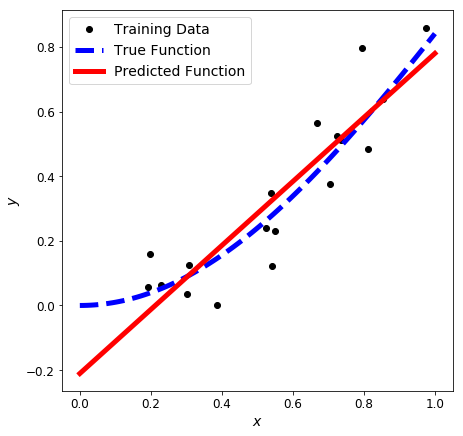

In [51]:
def example1d(num_data=4, noise_std=1e-2):
    #np.random.seed(5)
    # Setup Training data
    ftrue = lambda x: x*np.sin(x)
    #ftrue = lambda x: 0.2 * x + 1
    xtrain = np.random.rand(num_data)
    ytrain = ftrue(xtrain) + noise_std * np.random.randn(num_data)
    
    # Compute MLE Estimator
    theta_mle = linear_least_squares_mle(xtrain[:, np.newaxis], ytrain)
    print("Maximum Likelihood Estimate: ", theta_mle)
    
    # Generate Predictions
    xtest = np.linspace(0, 1, 100)
    ytest = ftrue(xtest)
    ypredict = theta_mle[0] + theta_mle[1] * xtest

    plt.figure(figsize=(7,7))
    plt.plot(xtrain, ytrain, 'ko', label='Training Data')
    plt.plot(xtest, ytest, '--b', lw=5, label='True Function')
    plt.plot(xtest, ypredict, '-r', lw=5, label='Predicted Function')
    plt.xlabel(r'$x$', fontsize=14)
    plt.ylabel(r'$y$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.show()
    
# play arond with the number of data and size of the noise
example1d(num_data=18, noise_std=1e-1)